In [72]:
import numpy as np
import pandas as pd

In [73]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [74]:
train_data=pd.read_csv("/Users/arunav.dey.7/Desktop/Machine Learning Course Data/titanic_train.csv")
train_dataframe=pd.DataFrame(train_data)
#train_dataframe=train_dataframe.columns=train_data.feature_names

test_data=pd.read_csv("/Users/arunav.dey.7/Desktop/Machine Learning Course Data/titanic_test.csv")

In [75]:
train_dataframe


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
663,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S,1
664,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q,0
665,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,1
666,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,0


In [76]:
test_dataframe=pd.DataFrame(test_data)

In [77]:
test_dataframe

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S
...,...,...,...,...,...,...,...,...,...,...
218,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S
219,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S
220,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
221,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S


In [78]:
import seaborn as sb

In [79]:
train_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

In [80]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    668 non-null    int64  
 1   Name      668 non-null    object 
 2   Sex       668 non-null    object 
 3   Age       536 non-null    float64
 4   SibSp     668 non-null    int64  
 5   Parch     668 non-null    int64  
 6   Ticket    668 non-null    object 
 7   Fare      668 non-null    float64
 8   Cabin     154 non-null    object 
 9   Embarked  667 non-null    object 
 10  Survived  668 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 57.5+ KB


In [81]:
train_data=train_data.drop(['Name','Ticket','Cabin'],1)

In [82]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,female,29.0,1,0,26.000,S,1
1,3,male,NaN,0,0,8.050,S,0
2,2,male,39.0,0,0,26.000,S,0
3,3,female,29.0,0,4,21.075,S,0
4,3,male,25.0,0,0,7.050,S,0


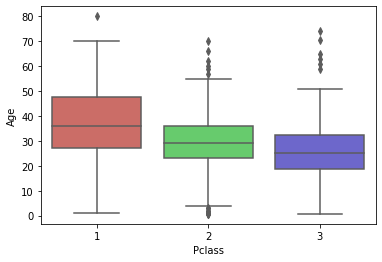

In [83]:
sb.boxplot(x='Pclass',y='Age',data=train_data,palette='hls')

In [84]:
def age_setter(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 30
        else:
            return 27
    else:
        return Age

In [85]:
train_data['Age']=train_data[['Age','Pclass']].apply(age_setter,axis=1)

In [86]:
train_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    1
Survived    0
dtype: int64

In [87]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [88]:
sex=pd.get_dummies(train_data['Sex'],drop_first=True)

In [89]:
sex.head()

,male
0,0
1,1
2,1
3,0
4,1


In [90]:
embarkment=pd.get_dummies(train_data['Embarked'],drop_first=True)

In [91]:
embarkment.head()

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [92]:
train_data.drop(['Sex','Embarked'],axis=1,inplace=True)

In [93]:
train_data.head()

,Pclass,Age,SibSp,Parch,Fare,Survived
0,2,29.0,1,0,26.000,1
1,3,27.0,0,0,8.050,0
2,2,39.0,0,0,26.000,0
3,3,29.0,0,4,21.075,0
4,3,25.0,0,0,7.050,0


In [94]:
train_data_dmy=pd.concat([train_data,sex,embarkment],axis=1)

In [95]:
train_data_dmy.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,2,29.0,1,0,26.000,1,0,0,1
1,3,27.0,0,0,8.050,0,1,0,1
2,2,39.0,0,0,26.000,0,1,0,1
3,3,29.0,0,4,21.075,0,0,0,1
4,3,25.0,0,0,7.050,0,1,0,1


In [96]:
train_data_dmy.drop(['Fare','Pclass'],axis=1,inplace=True)

In [98]:
train_data_dmy

,Age,SibSp,Parch,Survived,male,Q,S
0,29.0,1,0,1,0,0,1
1,27.0,0,0,0,1,0,1
2,39.0,0,0,0,1,0,1
3,29.0,0,4,0,0,0,1
4,25.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...
663,17.0,0,0,1,0,0,1
664,27.0,0,0,0,1,1,0
665,32.0,0,0,1,1,0,1
666,22.0,0,0,0,0,0,1


In [135]:
train_data_dmy

,Age,SibSp,Parch,Survived,male,Q,S
0,29.0,1,0,1,0,0,1
1,27.0,0,0,0,1,0,1
2,39.0,0,0,0,1,0,1
3,29.0,0,4,0,0,0,1
4,25.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...
663,17.0,0,0,1,0,0,1
664,27.0,0,0,0,1,1,0
665,32.0,0,0,1,1,0,1
666,22.0,0,0,0,0,0,1


In [143]:
X_train=np.array(train_data_dmy[['Age','SibSp','Parch','male','Q','S']])

,Age,SibSp,Parch,male,Q,S
0,29.0,1,0,0,0,1
1,27.0,0,0,1,0,1
2,39.0,0,0,1,0,1
3,29.0,0,4,0,0,1
4,25.0,0,0,1,0,1
...,...,...,...,...,...,...
663,17.0,0,0,0,0,1
664,27.0,0,0,1,1,0
665,32.0,0,0,1,0,1
666,22.0,0,0,0,0,1


In [129]:
Y_train=np.array(train_data_dmy['Survived'])

In [131]:
pd.DataFrame(Y_train)

,0
0,1
1,0
2,0
3,0
4,0
...,...
662,1
663,0
664,1
665,0


In [ ]:
#NOW FORMATTING THE TEST DATA

In [106]:
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S
...,...,...,...,...,...,...,...,...,...,...
218,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S
219,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S
220,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
221,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S


In [108]:
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          45
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       173
Embarked      1
dtype: int64

In [109]:
test_data.drop(['Name','Ticket','Cabin'],1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,male,8.0,1,1,36.7500,S
1,1,female,49.0,0,0,25.9292,S
2,3,male,NaN,0,0,7.7375,Q
3,2,female,24.0,2,1,27.0000,S
4,1,male,36.0,0,0,26.2875,S
...,...,...,...,...,...,...,...
218,3,male,20.0,1,0,7.9250,S
219,1,male,45.0,0,0,26.5500,S
220,1,female,17.0,1,0,108.9000,C
221,3,male,43.0,0,0,6.4500,S


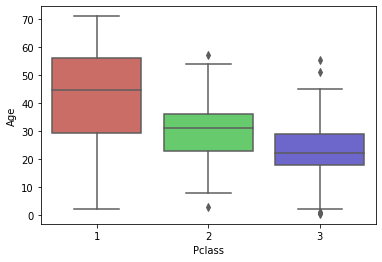

In [110]:
sb.boxplot(x='Pclass',y='Age',data=test_data,palette='hls')

In [112]:
def age_setter2(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 44
        elif Pclass==2:
            return 31
        else:
            return 28
    else:
        return Age

In [113]:
test_data['Age']=test_data[['Age','Pclass']].apply(age_setter2,axis=1)

In [114]:
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       173
Embarked      1
dtype: int64

In [115]:
test_data.dropna(inplace=True)
test_data.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [116]:
sexT=pd.get_dummies(test_data['Sex'],drop_first=True)

In [118]:
embarkmentT=pd.get_dummies(test_data['Embarked'],drop_first=True)

In [122]:
test_data_dmy=pd.concat([test_data,sexT,embarkmentT],axis=1)

In [123]:
test_data_dmy.drop(['Fare','Pclass'],axis=1,inplace=True)

In [150]:
test_data_dmy=test_data_dmy.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [151]:
test_data_dmy

,Age,SibSp,Parch,male,Q,S
1,49.0,0,0,0,0,1
4,36.0,0,0,1,0,1
10,63.0,1,0,0,0,1
12,24.0,0,0,0,0,0
14,71.0,0,0,1,0,0
22,58.0,0,0,0,0,1
25,44.0,0,0,1,0,1
39,47.0,0,0,1,0,1
45,4.0,0,2,1,0,1
52,36.0,0,0,0,0,1


In [152]:
test_data_dmy

,Age,SibSp,Parch,male,Q,S
1,49.0,0,0,0,0,1
4,36.0,0,0,1,0,1
10,63.0,1,0,0,0,1
12,24.0,0,0,0,0,0
14,71.0,0,0,1,0,0
22,58.0,0,0,0,0,1
25,44.0,0,0,1,0,1
39,47.0,0,0,1,0,1
45,4.0,0,2,1,0,1
52,36.0,0,0,0,0,1


In [154]:
X_test=np.array(test_data_dmy)

In [156]:
LogReg=LogisticRegression()

In [157]:
LogReg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
Y_pred=LogReg.predict(X_test)

In [159]:
Y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0])

In [171]:
np.savetxt("/Users/arunav.dey.7/Desktop/Machine Learning Course Data/titanic_pred.csv",Y_pred,fmt='%1.0f')